In [22]:

from xbbg import blp

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression

import shap

import datetime
from dateutil.relativedelta import relativedelta



In [23]:
factors_jpy = ["USDJPY CURNCY", "ES1 INDEX", "USOSFR2 CURNCY", "USGG10Y INDEX", "UX1 INDEX", "TZT1 COMDTY", "CO1 COMDTY", "JB1 COMDTY"]
names_jpy = ["USDJPY", "SPX", "2Y SWAPS", "10Y TREASURY", "VIX", "EU NATGAS", "BRENT", "1st JGB Fut."]
log_flag_jpy = [True, True, False, False, False, True, True, True]

factors_eur = ["EURUSD CURNCY", "ES1 INDEX", "USGG2Y INDEX", "USGG10Y INDEX", "CO1 COMDTY", "UX1 INDEX", "TZT1 COMDTY", "GDBR2 INDEX", "VGA INDEX", "GBTPGR10 INDEX"]
names_eur = ["EURUSD", "SPX", "2Y TREASURY", "10Y TREASURY", "BRENT CRUDE", "VIX", "EU NATGAS", "2Y BUND", "SX5E", "10Y BTP"]
log_flag_eur = [True, True, False, False, True, False, True, False, True, False]

factors_AUD = ["AUDUSD CURNCY", "ES1 INDEX", "USGG2Y INDEX", "USGG10Y INDEX", "CO1 COMDTY", "UX1 INDEX", "GACGB10 INDEX", "IOEA COMDTY"]
names_AUD = ["AUDUSD", "SPX", "2Y TREASURY", "10Y TREASURY", "BRENT CRUDE", "VIX", "10Y ACGB", "IRON ORE"]
log_flag_AUD = [True, True, False, False, True, False, False, True]

factors_eur_new = ["EURUSD CURNCY", ".EUUS10 U Index", "TZT1 Comdty", "CO1 COMDTY", "ES1 INDEX", "SX5E INDEX", "VIX Index", ".EUUS1 U INDEX", "GBTPGR10 INDEX", "GDBR10 INDEX"]
names_eur_new = ["EURUSD", "10Y EU-US Swap Diff", "EU NATGAS", "BRENT CRUDE", "S&P", "SX5E", "VIX", "1Y EU-US Swap Diff", "10Y BTP", "10Y BUND"]
log_flag_eur_new = [True, False, True, True, True, True, False, False, False, False]

factors_ZAR = ["USDZAR CURNCY", "ES1 INDEX", "UX1 INDEX",
              "NQ1 INDEX", "USSW10 CURNCY", "USSW2 CURNCY", "CO1 COMDTY"
               , "ITRX XOVER CDSI GEN 5Y Corp"]
names_ZAR = ["USDZAR", "SPX Fut.", "VIX Fut.", "NASDAQ Fut.",
            "10Y US IRS", "2Y US IRS", "Brent", "ITRX Crossover"]
log_flag_ZAR = [True, True, False, True, False, False, True, False]

factors_AUDJPY = ["AUDJPY CURNCY", "ES1 INDEX", "USGG2Y INDEX", "USGG10Y INDEX", "CO1 COMDTY", "UX1 INDEX", "GACGB10 INDEX", "IOEA COMDTY", "JB1 COMDTY"]
names_AUDJPY = ["AUDJPY", "SPX", "2Y TREASURY", "10Y TREASURY", "BRENT CRUDE", "VIX", "10Y ACGB", "IRON ORE", "JGB FUT"]
log_flag_AUDJPY = [True, True, False, False, True, False, False, True, True]


factors_GBP = ["GBPUSD CURNCY", "ES1 INDEX", "USGG2Y INDEX", "USGG10Y INDEX", "CO1 COMDTY", "UX1 INDEX", "GUKG10 INDEX", "GUKG2 INDEX"]
names_GBP = ["GBPUSD", "SPX", "2Y TREASURY", "10Y TREASURY", "BRENT CRUDE", "VIX", "10Y GILT", "2Y GILT"]
log_flag_GBP = [True, True, False, False, True, False, False, False]


In [24]:
factors_riskpar_zar = ["USDZAR CURNCY", "ES1 INDEX", "NQ1 INDEX", "UX1 INDEX", "USSW2 CURNCY",
                      "USSW10 CURNCY", "CDX HY CDSI GEN 5Y SPRD Corp",
                      "CO1 COMDTY", "XAUUSD CURNCY"]
names_riskpar_zar = ["USDZAR CURNCY", "ES Fut", "NQ Fut", "VIX Fut", "2y US Swaps",
                    "10y US Swaps", "HY 5y CDS", "Brent Crude", "Gold Spot"]
log_flag_riskpar_zar = [True, True, True, False, False, False, False, True, True]

factors_riskpar_mxn = ["USDMXN CURNCY", "ES1 INDEX", "NQ1 INDEX", "UX1 INDEX", "USSW2 CURNCY",
                      "USSW10 CURNCY", "CDX HY CDSI GEN 5Y SPRD Corp",
                      "CO1 COMDTY", "XAUUSD CURNCY"]
names_riskpar_mxn = ["USDMXN CURNCY", "ES Fut", "NQ Fut", "VIX Fut", "2y US Swaps",
                    "10y US Swaps", "HY 5y CDS", "Brent Crude", "Gold Spot"]
log_flag_riskpar_mxn = [True, True, True, False, False, False, False, True, True]


factors_riskpar_brl = ["USDBRL CURNCY", "ES1 INDEX", "NQ1 INDEX", "UX1 INDEX", "USSW2 CURNCY",
                      "USSW10 CURNCY", "CDX HY CDSI GEN 5Y SPRD Corp",
                      "CO1 COMDTY", "XAUUSD CURNCY"]
names_riskpar_brl = ["USDBRL", "ES Fut", "NQ Fut", "VIX Fut", "2y US Swaps",
                    "10y US Swaps", "HY 5y CDS", "Brent Crude", "Gold Spot"]
log_flag_riskpar_brl = [True, True, True, False, False, False, False, True, True]

factors_riskpar_aud = ["AUDUSD CURNCY", "ES1 INDEX", "NQ1 INDEX", "UX1 INDEX", "USSW2 CURNCY", "USSW10 CURNCY", "CDX HY CDSI GEN 5Y SPRD Corp", "CO1 COMDTY", "XAUUSD CURNCY"]
names_riskpar_aud = ["AUDUSD", "ES Fut", "NQ Fut", "VIX Fut", "2y US Swaps",
                    "10y US Swaps",  "HY 5y CDS", "Brent Crude", "Gold Spot"]
log_flag_riskpar_aud = [True, True, True, False, False, False, False, True, True]

In [14]:

natgas_eurhuf = ["EURHUF CURNCY", "TZT1 COMDTY", "HFSW2 CURNCY", "EUSA2 CURNCY", "ES1 INDEX"]
names_natgas_eurhuf = ["EURHUF", "EU NATGAS FUT", "2Y HUF SWAP", "2Y EUR SWAP", "SPX FUT"]
log_flag_natgas_eurhuf = [True, True, False, False, True]

natgas_eurnok = ["EURNOK CURNCY", "TZT1 COMDTY", "NKSW2 CURNCY", "EUSA2 CURNCY", "ES1 INDEX"]
names_natgas_eurnok = ["EURNOK", "EU NATGAS FUT", "2Y NOK SWAP", "2Y EUR SWAP", "SPX FUT"]
log_flag_natgas_eurnok = [True, True, False, False, True]

natgas_eurpln = ["EURPLN CURNCY", "TZT1 COMDTY", "PZSW2 CURNCY", "EUSA2 CURNCY", "ES1 INDEX"]
names_natgas_eurpln = ["EURPLN", "EU NATGAS FUT", "2Y PLN SWAP", "2Y EUR SWAP", "SPX FUT"]
log_flag_natgas_eurpln = [True, True, False, False, True]

natgas_eurusd = ["EURUSD CURNCY", "TZT1 COMDTY", "USSW2 CURNCY", "EUSA2 CURNCY", "ES1 INDEX"]
names_natgas_eurusd = ["EURUSD", "EU NATGAS FUT", "2Y USD SWAP", "2Y EUR SWAP", "SPX FUT"]
log_flag_natgas_eurusd = [True, True, False, False, True]

In [4]:
def hist_data(tickers, start_date, end_date, condition = "LAST_PRICE"):
    # Return a matrix of prices, with modifiable pricing condition
    data = blp.bdh(tickers, condition, start_date,end_date)
    data = data.dropna()
    clean_cols = []
    for col in data.columns:
        clean_cols.append(col[0])
    data.columns = clean_cols
    return data


In [41]:
def linear_decomp(label, tickers, lookback_days, diff = True, names = None, log_flag = None, conditional = None):
    
    # Pull Data; Calculate Diffs; Drop NA
    end_date = datetime.date.today()
    start_date = end_date-relativedelta(days = lookback_days)
    df = hist_data(tickers = tickers, start_date = start_date, end_date = end_date)
    
    # Take log of certain series if that's called for, scale * 100 if so, to match with rates scaling
    if log_flag is not None:
        for x in range(0, len(df.columns)):
            if log_flag[x] == True:
                df.iloc[:,x] = df.iloc[:,x].apply(lambda x: 100*np.log(x))
    
    #df = df.apply(lambda x: np.log(x)*100)
    if diff == True:
        df = df.diff()
        df.dropna(inplace = True)

    print(df.iloc[-1, :])
        
    # Rename Columns for Visual Presentation
    if names is not None:
        df.columns = names

    if conditional is not None:
        if conditional == "Positive":
            df = df[df[label]>=0]
        if conditional == "Negative":
            df = df[df[label]<=0]
    print(df)
    # Linear Model    
    dep_var = df[label]
    indep_var = df.drop(columns = label)
    
    
    # (Note we do not include today's sample in the model; we look to forecast today's return)
    model = sm.OLS(exog = indep_var.iloc[:-1, :], endog = dep_var.iloc[:-1])
    model_fit = model.fit()
    print(model_fit.summary())
    
    model_sk = LinearRegression()
    model_sk.fit(indep_var, dep_var)
    
    cv = RepeatedKFold(n_splits=30, n_repeats=3, random_state=1)
    scores = cross_val_score(model_sk, indep_var, dep_var, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    scores = np.absolute(scores)
    print('RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
    
    # SHAP Computations
    X1000 = shap.utils.sample(indep_var, 1000)
    explainer = shap.Explainer(model_fit.predict, X1000)
    
    shap_values = explainer(indep_var)
    shap.plots.waterfall(shap_values[-1], max_display=14, show=False)
    if conditional is not None:
        plt.title("%s 1-Day Linear Theoretical Return by Component, %s \n%s Returns Filtering\n"%(label, df.index[-1], conditional),
              fontsize = 16)
    else:
        plt.title("%s 1-Day Linear Theoretical Return by Component, %s \n"%(label, df.index[-1]),
              fontsize = 16)
    
    plt.xlabel("Factor % Impact on Return", fontsize = 14)
    plt.show()
    
    shap.plots.bar(shap_values, show = False)
    if conditional is not None:
        plt.title("%s Mean Absolute Daily Factor Impacts, Linear Model\n%s Day Lookback, %s Returns Filtering"%(label, lookback_days, conditional), 
                  fontsize = 16)
    else:
        plt.title("%s Mean Absolute Daily Factor Impacts, Linear Model\n%s Day Lookback"%(label, lookback_days), 
                  fontsize = 16)
    plt.xlabel("Abs Factor Impact, %")
    plt.show()
    
    
    

EURUSD CURNCY     -0.088526
.EUUS10 U Index    0.000400
TZT1 Comdty       -0.034975
CO1 COMDTY         0.194742
ES1 INDEX         -1.009079
SX5E INDEX        -1.300327
VIX Index          0.780000
.EUUS1 U INDEX     0.047800
GBTPGR10 INDEX     0.182000
GDBR10 INDEX       0.112000
Name: 2022-08-17, dtype: float64
              EURUSD  10Y EU-US Swap Diff  EU NATGAS  BRENT CRUDE       S&P  \
2020-08-28  0.682827               0.0199  23.024183    -0.088751  0.550808   
2020-08-31  0.276857               0.0195   0.624779     0.509245 -0.157064   
2020-09-09  0.212035               0.0098  -0.631503     2.507268  1.922637   
2020-09-10  0.101617               0.0403  -2.051837    -1.805862 -1.772846   
2020-09-11  0.262035              -0.0321  -0.180840    -0.575793 -0.202270   
...              ...                  ...        ...          ...       ...   
2022-08-08  0.137390               0.0257  -1.677086     1.806177 -0.120649   
2022-08-09  0.156786               0.0122  -0.452188   

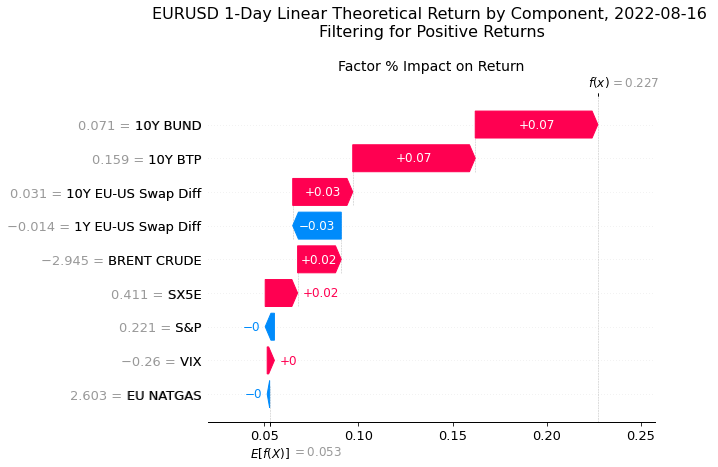

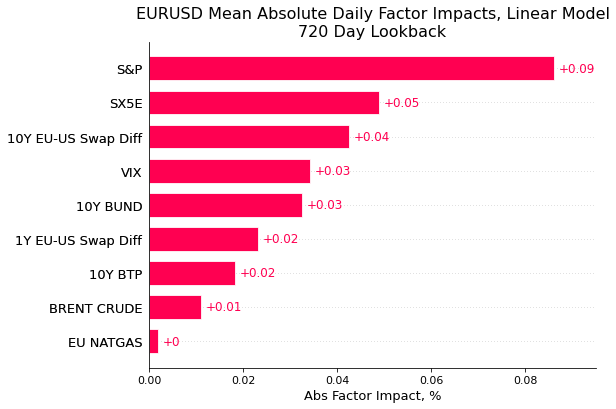

In [40]:
linear_decomp(label = "EURUSD", tickers = factors_eur_new, lookback_days = 720, 
              names = names_eur_new, log_flag = log_flag_eur_new, conditional  = "Positive")

USDJPY CURNCY     0.816210
ES1 INDEX        -0.804106
USOSFR2 CURNCY    0.084900
USGG10Y INDEX     0.087200
UX1 INDEX         0.109400
TZT1 COMDTY      -0.034975
CO1 COMDTY        0.453810
JB1 COMDTY       -0.086353
Name: 2022-08-17, dtype: float64
              USDJPY       SPX  2Y SWAPS  10Y TREASURY     VIX  EU NATGAS  \
2022-02-22  0.060846 -1.006545    0.0960        0.0104 -0.1881   7.854196   
2022-02-24  0.390270 -0.372787    0.0010        0.0243  0.5886  52.080958   
2022-02-25  0.017310  2.216157   -0.0024       -0.0016 -1.2915 -35.242114   
2022-02-28 -0.477121 -0.274349   -0.1712       -0.1367  1.3597   4.324645   
2022-03-01 -0.069589 -1.481850   -0.1195       -0.0975  3.5072  21.032479   
...              ...       ...       ...           ...     ...        ...   
2022-08-10 -1.612336  2.051785   -0.0444        0.0036 -1.6383   6.634538   
2022-08-12  0.398033  1.672398    0.0646        0.0503 -0.1640   0.360168   
2022-08-15 -0.074979  0.402134   -0.0604       -0.0434 -0.

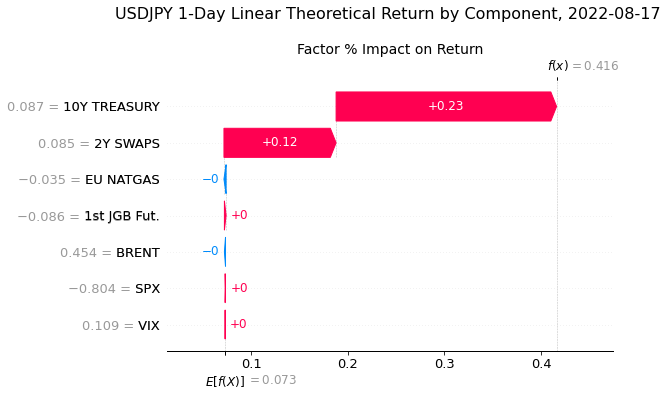

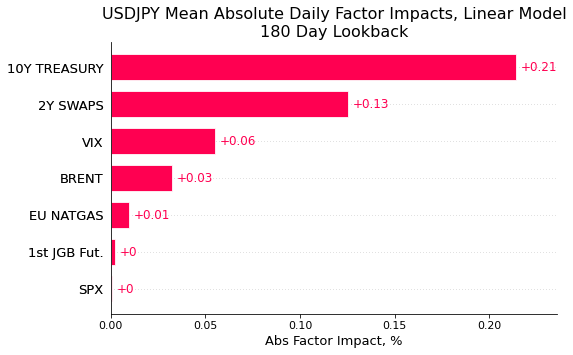

In [42]:
linear_decomp(label = "USDJPY", tickers = factors_jpy, lookback_days = 180, names = names_jpy, log_flag = log_flag_jpy)

AUDUSD CURNCY   -1.328539
ES1 INDEX       -1.083579
USGG2Y INDEX     0.185100
USGG10Y INDEX    0.136700
CO1 COMDTY      -1.046683
UX1 INDEX        0.699900
GACGB10 INDEX   -0.058000
IOEA COMDTY      0.283286
Name: 2022-08-05, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                 AUDUSD   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.365
Method:                 Least Squares   F-statistic:                              10.60
Date:                Fri, 05 Aug 2022   Prob (F-statistic):                    3.89e-10
Time:                        09:33:43   Log-Likelihood:                         -102.05
No. Observations:                 117   AIC:                                      218.1
Df Residuals:                     110   BIC:                                      237.4
Df Model:                           7                  

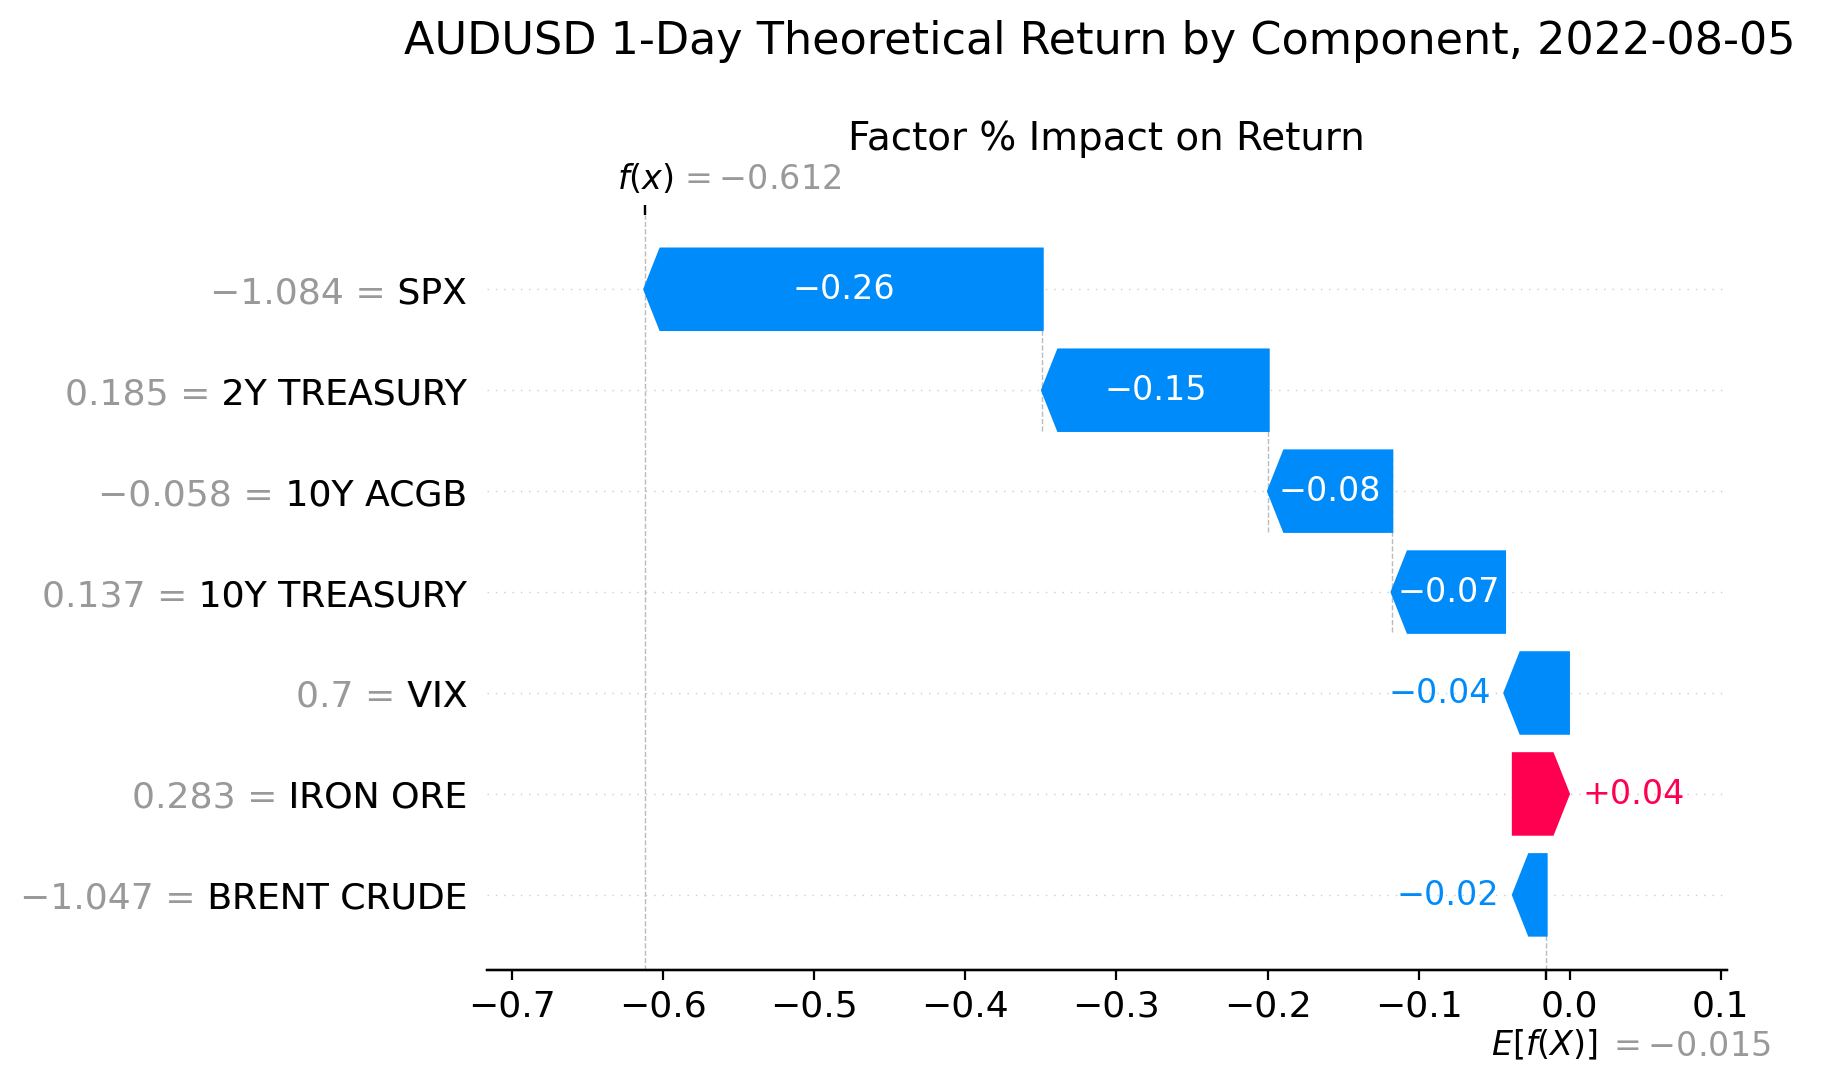

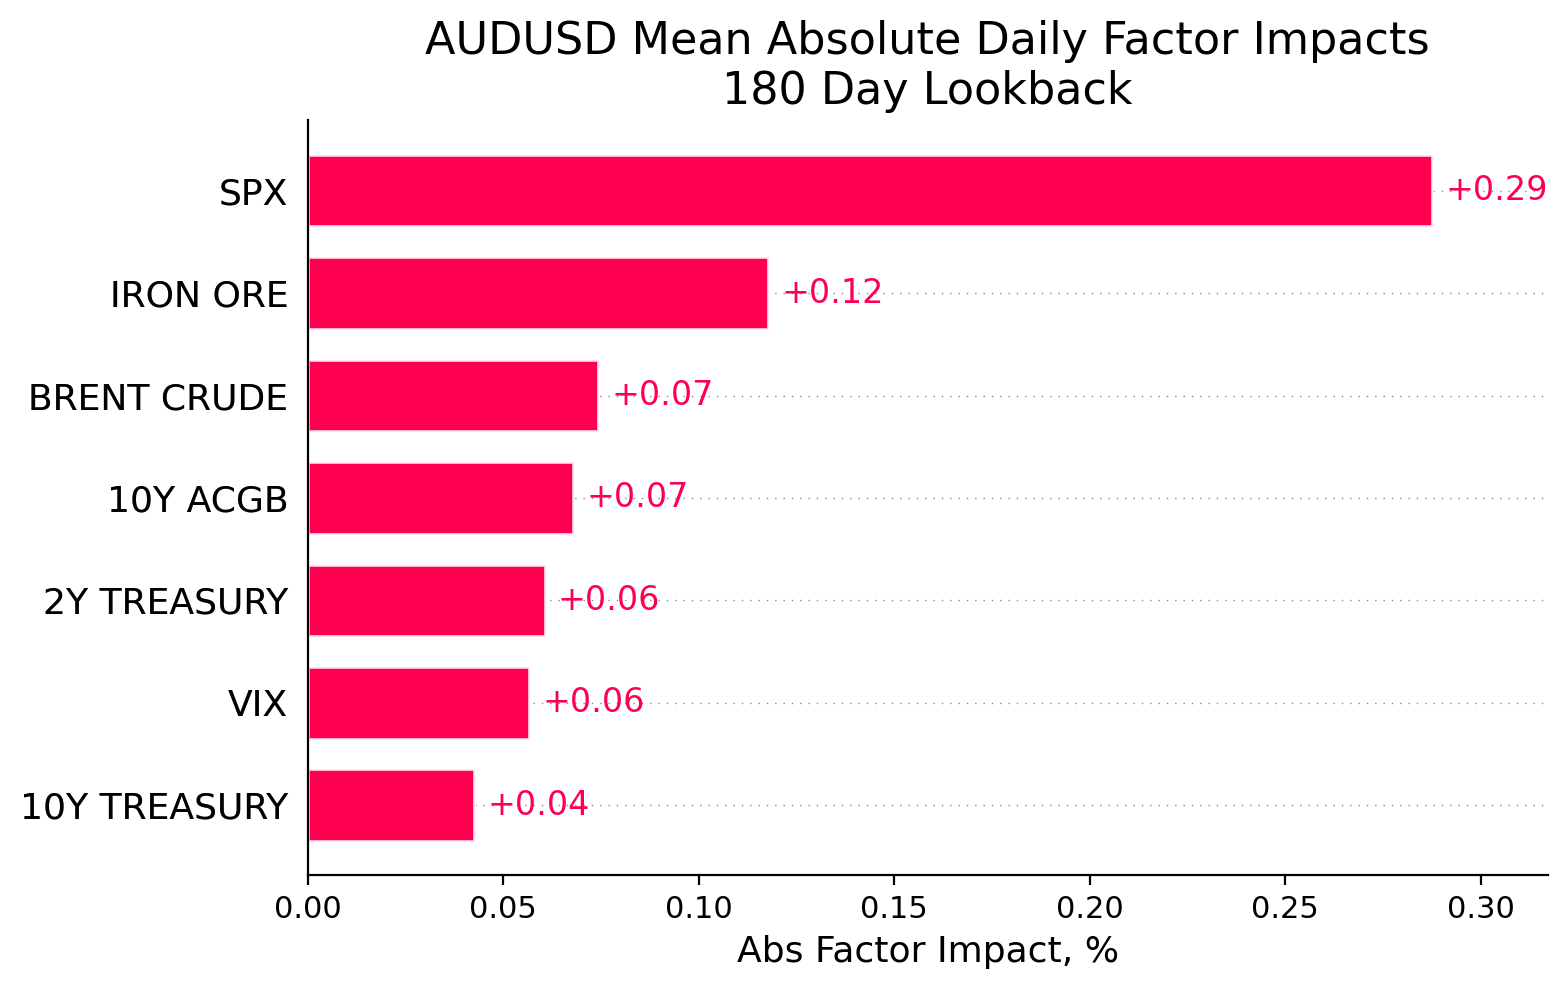

In [75]:
linear_decomp(label = "AUDUSD", tickers = factors_AUD, lookback_days = 180, names = names_AUD, log_flag = log_flag_AUD)

                                 OLS Regression Results                                
Dep. Variable:                 USDZAR   R-squared (uncentered):                   0.295
Model:                            OLS   Adj. R-squared (uncentered):              0.251
Method:                 Least Squares   F-statistic:                              6.642
Date:                Tue, 19 Jul 2022   Prob (F-statistic):                    1.45e-06
Time:                        10:53:09   Log-Likelihood:                         -141.44
No. Observations:                 118   AIC:                                      296.9
Df Residuals:                     111   BIC:                                      316.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

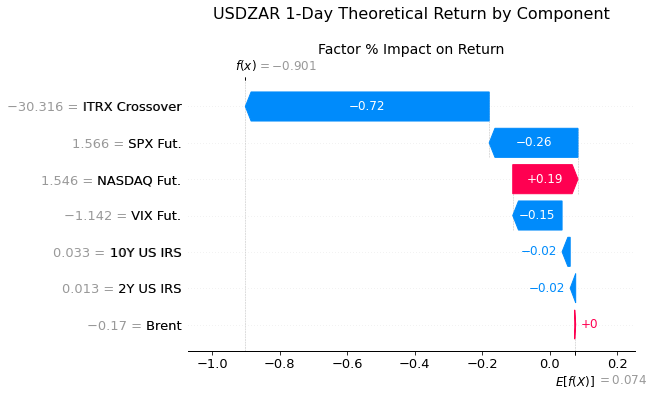

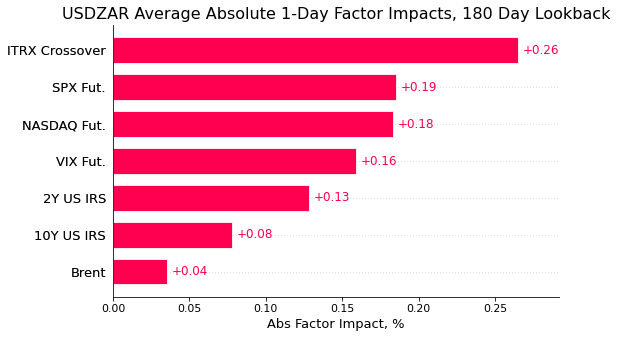

In [427]:
linear_decomp(label = "USDZAR", tickers = factors_ZAR, lookback_days = 180, names = names_ZAR, log_flag = log_flag_ZAR)

AUDJPY CURNCY   -1.967047
ES1 INDEX       -0.706286
USGG2Y INDEX    -0.014400
USGG10Y INDEX   -0.026900
CO1 COMDTY      -0.140056
UX1 INDEX        0.735600
GACGB10 INDEX   -0.080000
IOEA COMDTY     -0.314763
JB1 COMDTY       0.132829
Name: 2022-08-02, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                 AUDJPY   R-squared (uncentered):                   0.526
Model:                            OLS   Adj. R-squared (uncentered):              0.488
Method:                 Least Squares   F-statistic:                              13.88
Date:                Tue, 02 Aug 2022   Prob (F-statistic):                    2.17e-13
Time:                        09:03:44   Log-Likelihood:                         -104.69
No. Observations:                 108   AIC:                                      225.4
Df Residuals:                     100   BIC:                                      246.8
Df Model:                    

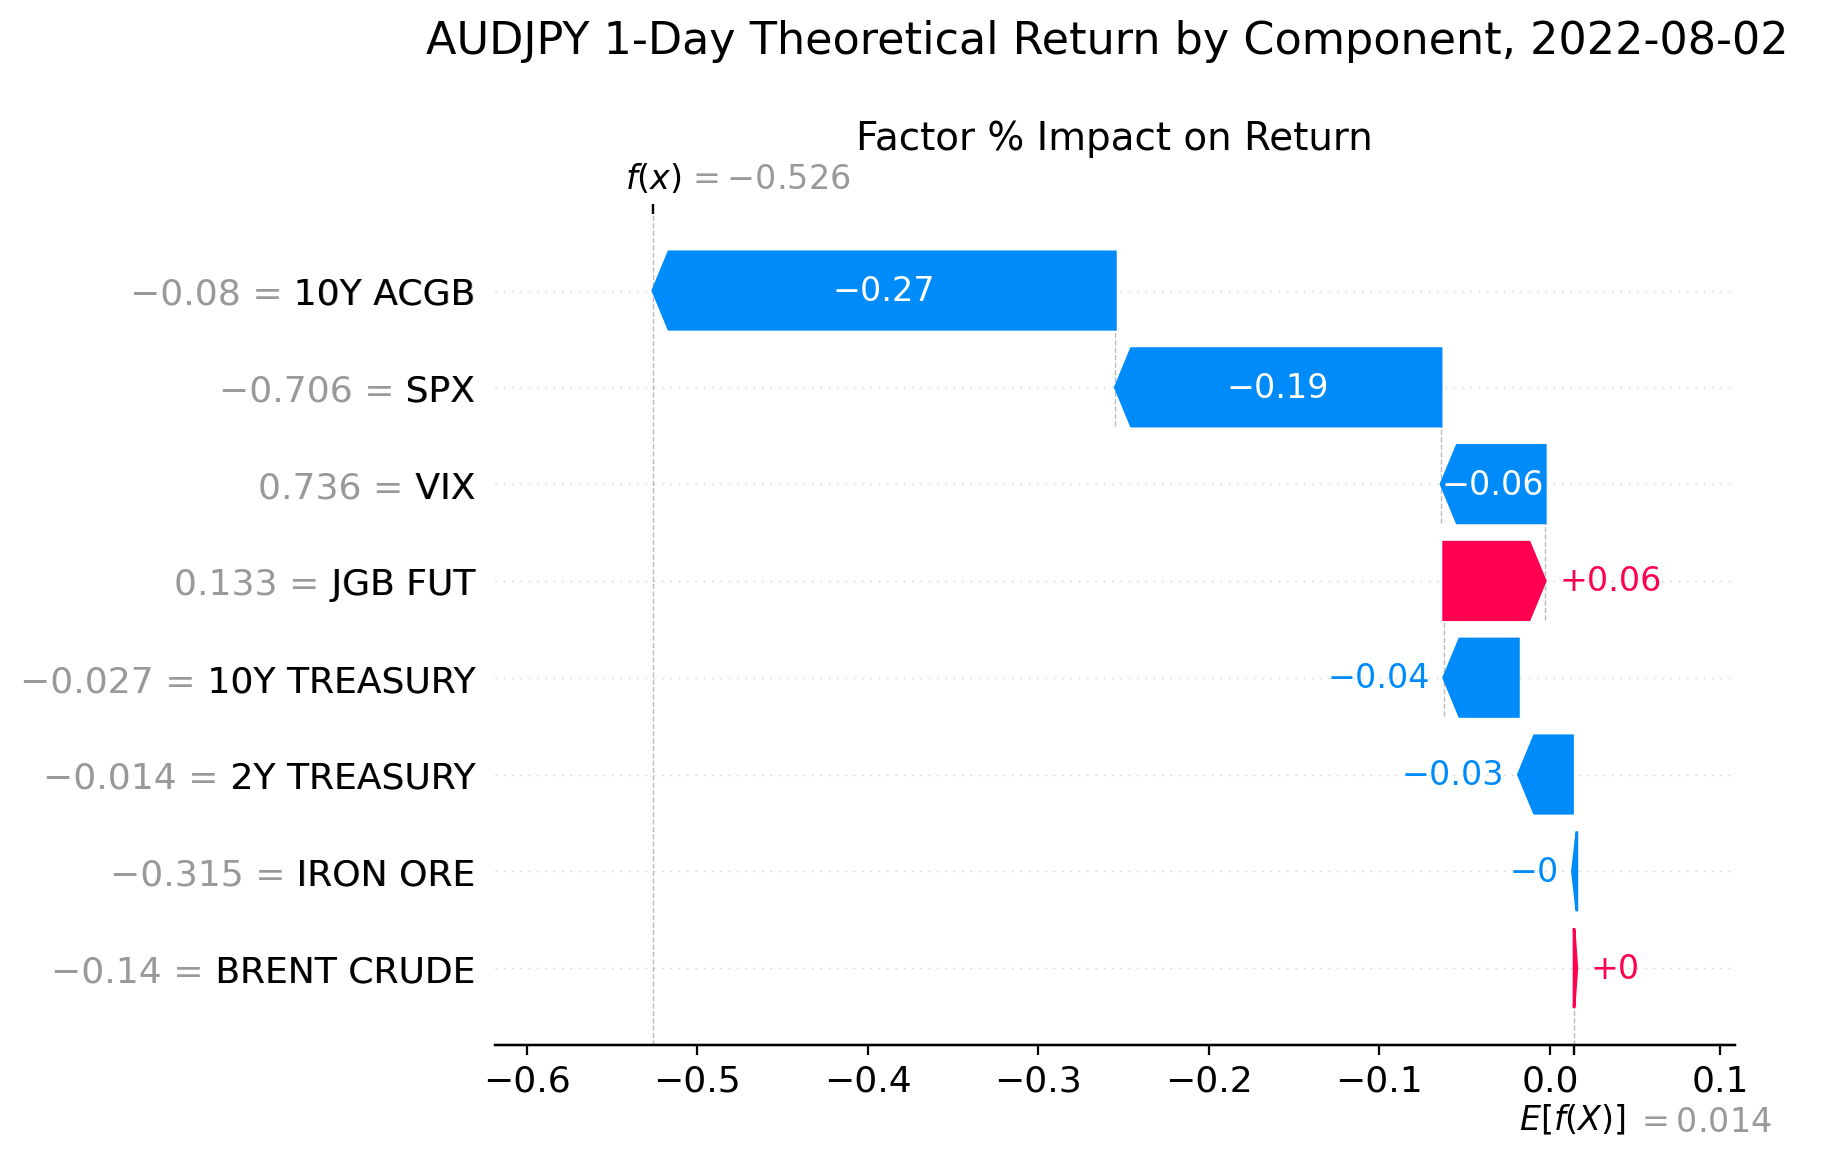

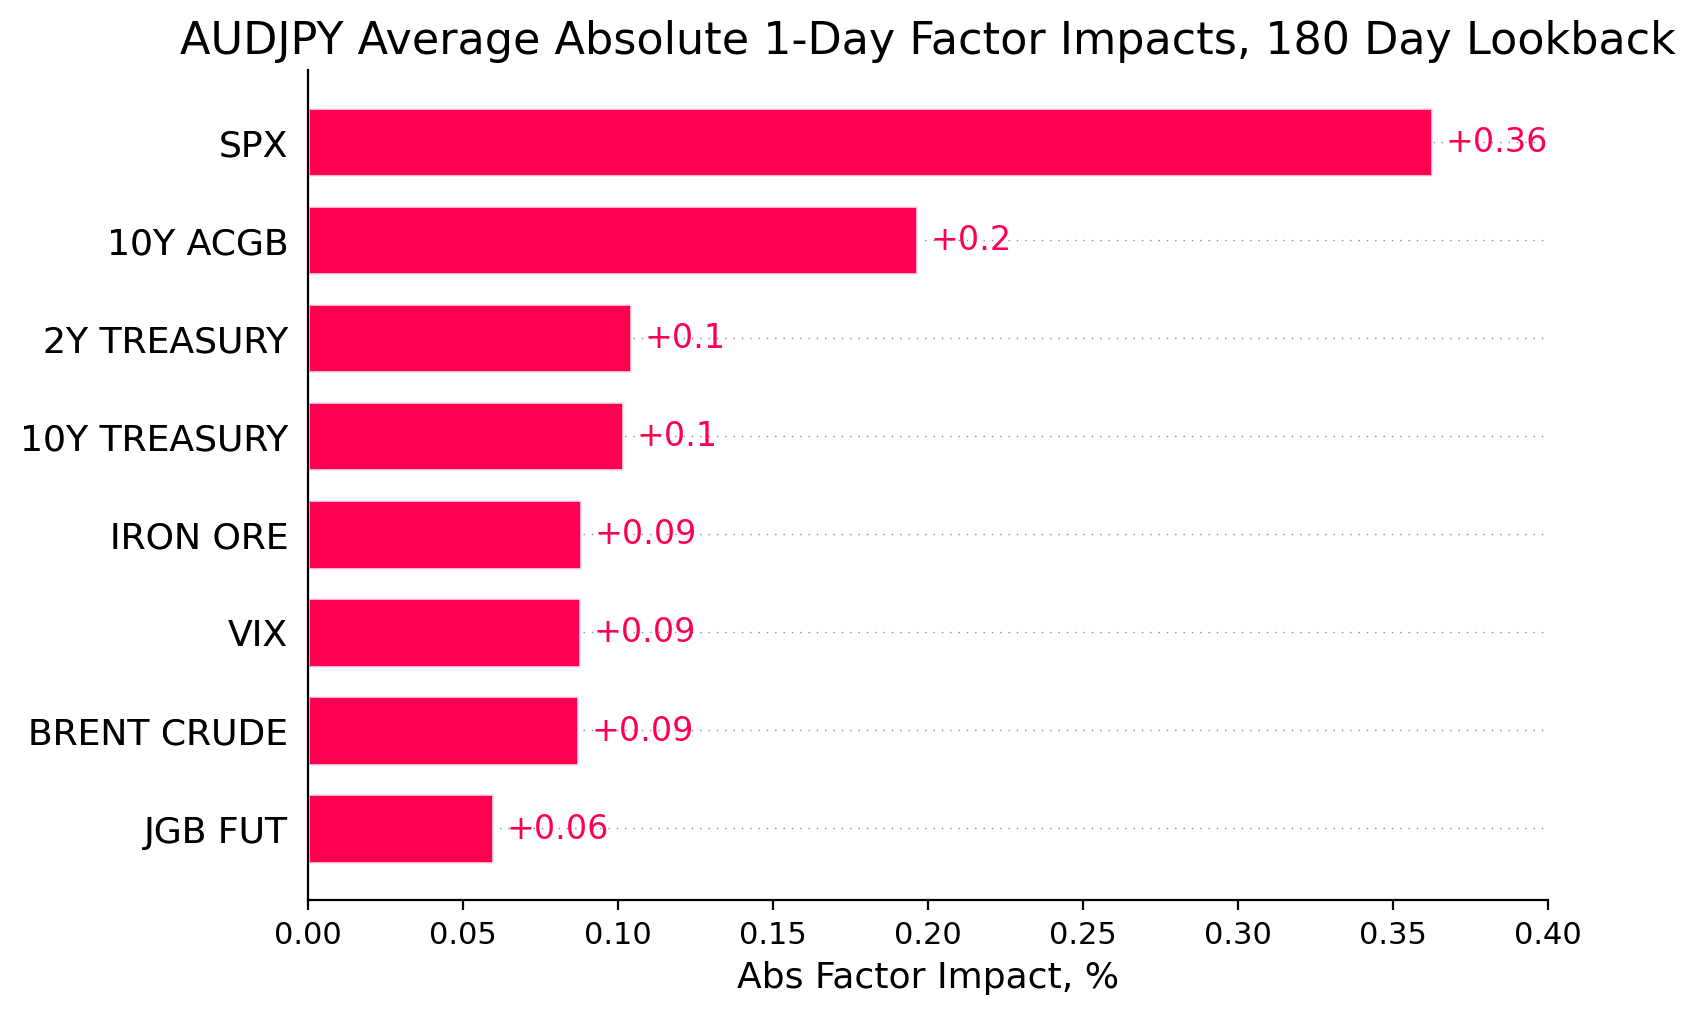

In [38]:
linear_decomp(label = "AUDJPY", tickers = factors_AUDJPY, lookback_days = 180, names = names_AUDJPY, log_flag = log_flag_AUDJPY)

USDBRL CURNCY                   1.037670
ES1 INDEX                       0.090967
NQ1 INDEX                       0.248486
UX1 INDEX                      -0.014400
USSW2 CURNCY                    0.120100
USSW10 CURNCY                   0.089400
CDX HY CDSI GEN 5Y SPRD Corp    4.025000
CO1 COMDTY                      0.875889
XAUUSD CURNCY                   0.247975
Name: 2022-08-02, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                 USDBRL   R-squared (uncentered):                   0.417
Model:                            OLS   Adj. R-squared (uncentered):              0.375
Method:                 Least Squares   F-statistic:                              9.835
Date:                Tue, 02 Aug 2022   Prob (F-statistic):                    3.12e-10
Time:                        11:05:18   Log-Likelihood:                         -155.96
No. Observations:                 118   AIC:                          

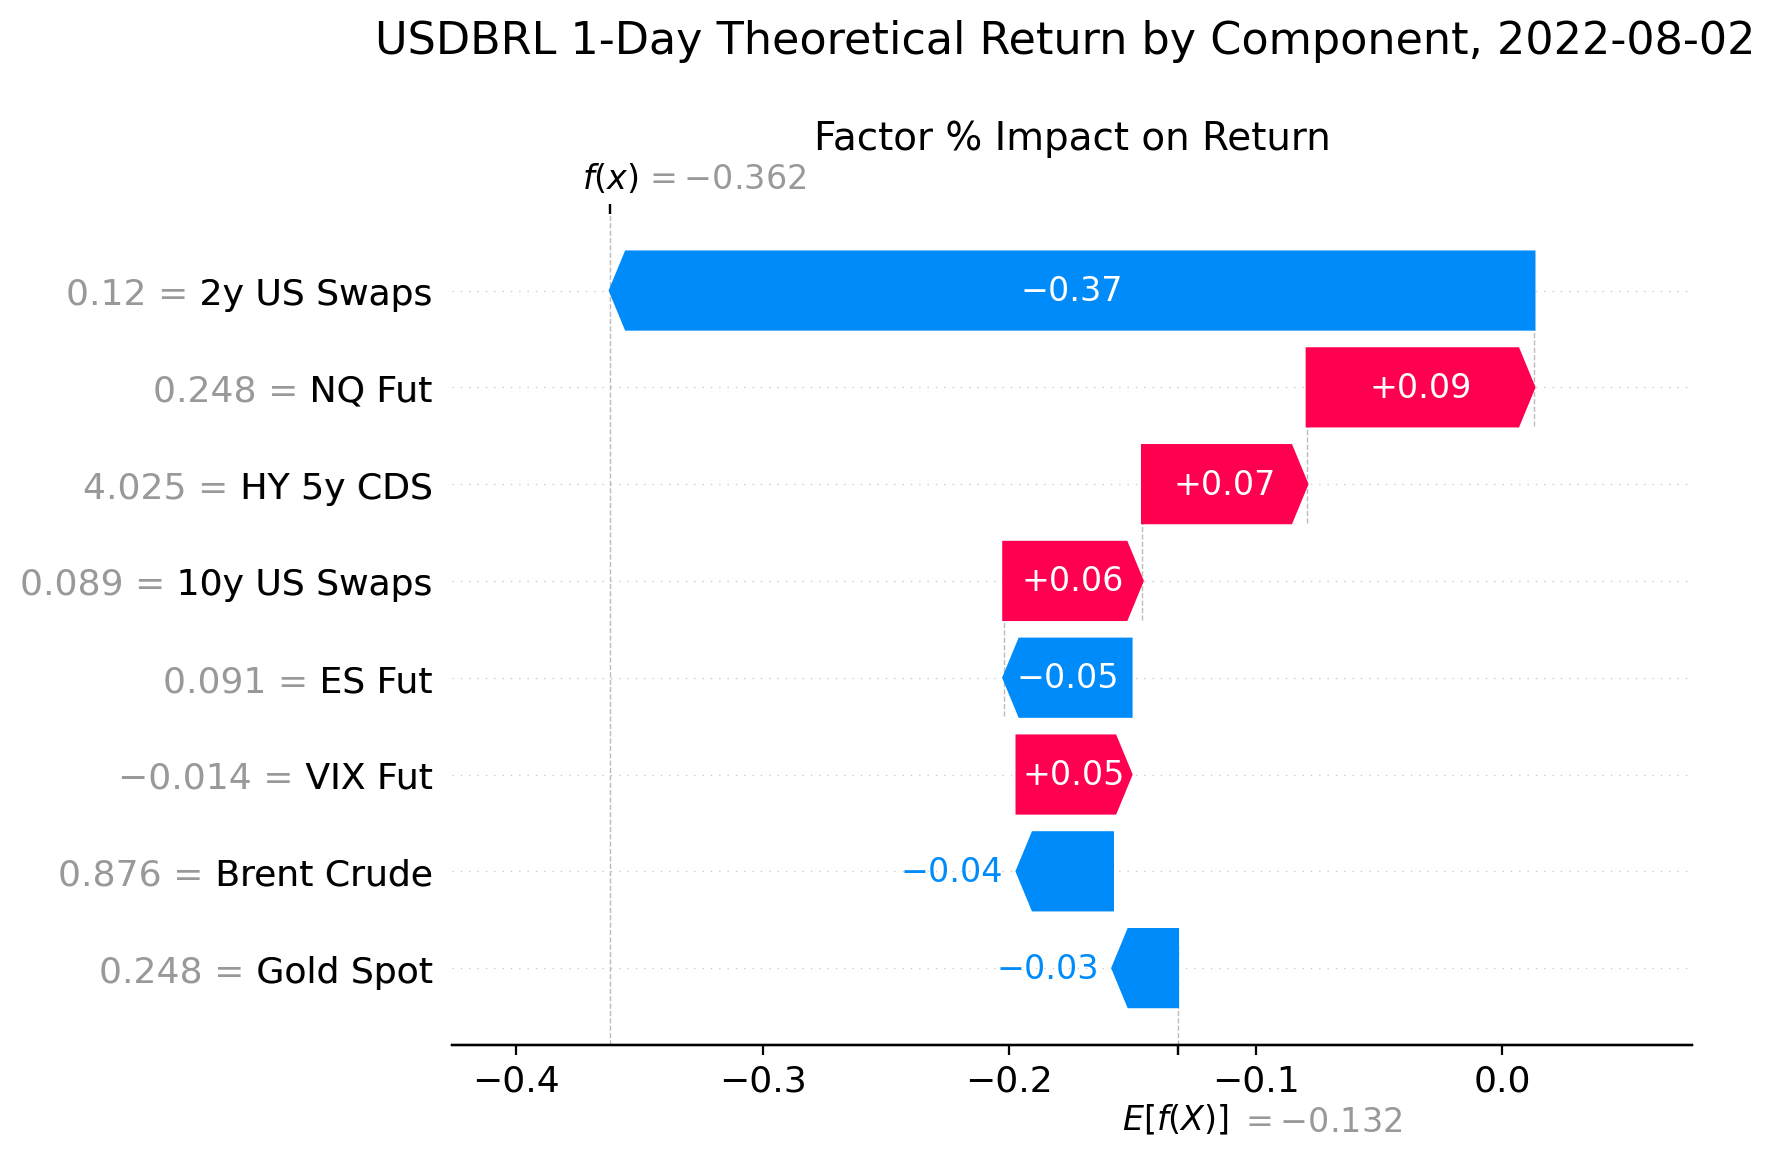

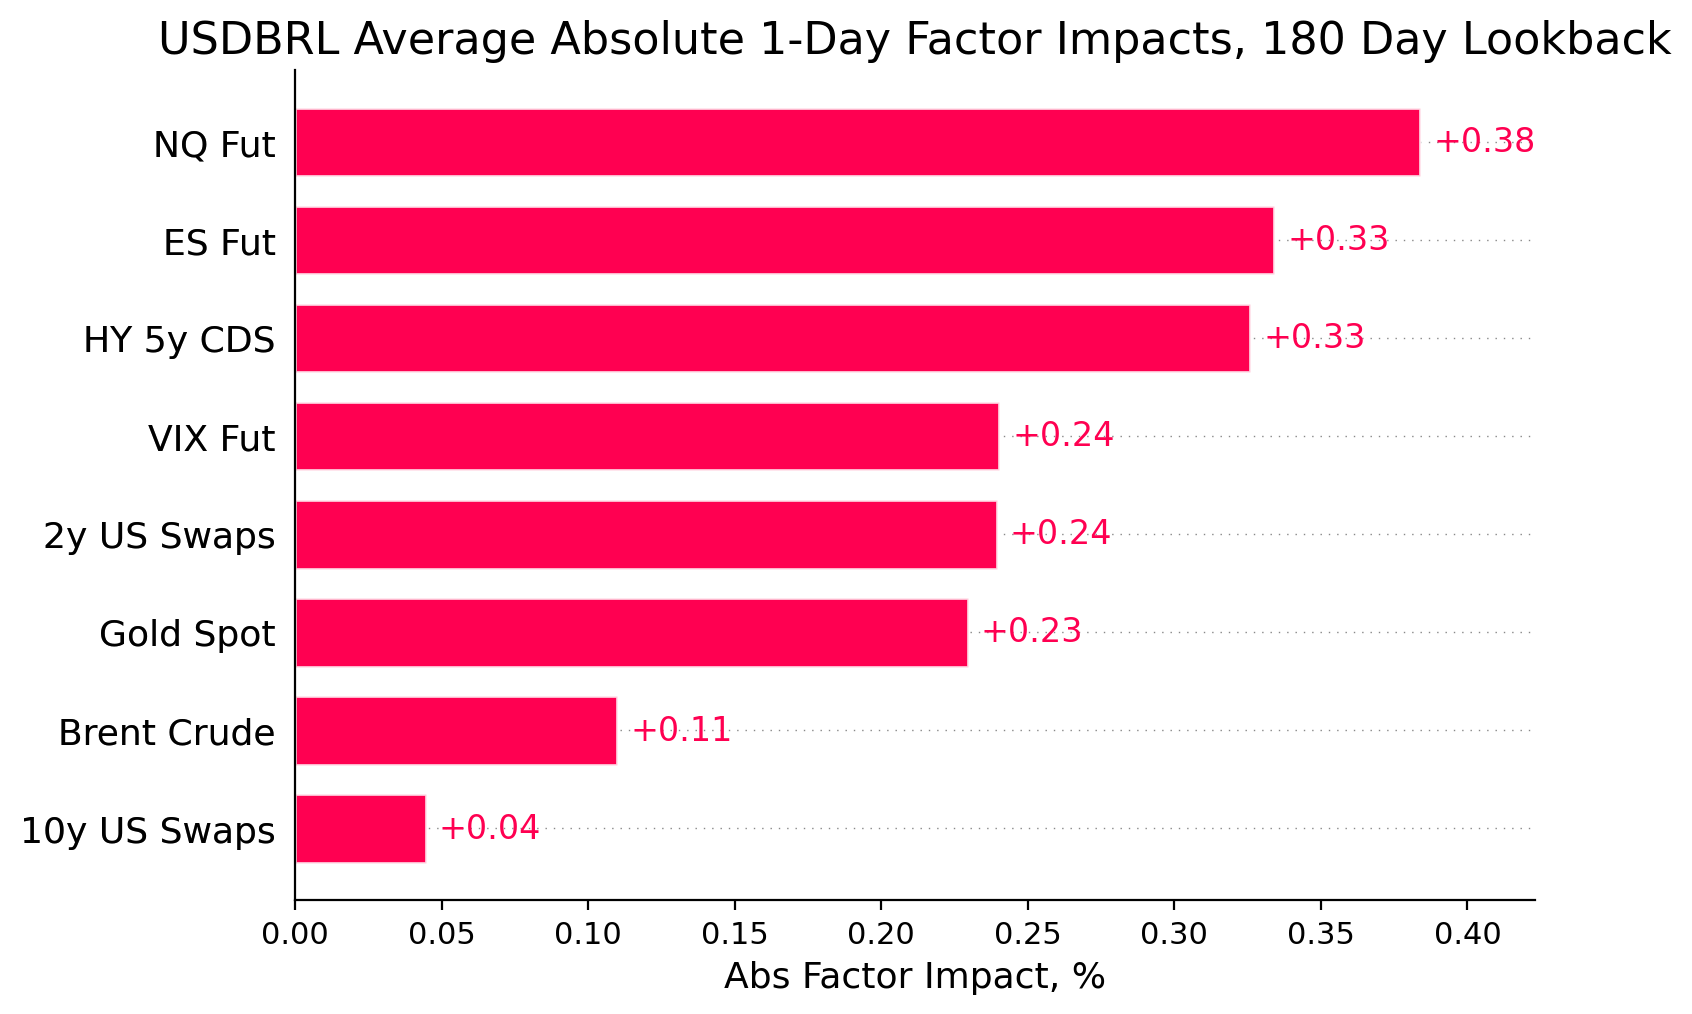

In [43]:
linear_decomp(label = "USDBRL", tickers = factors_riskpar_brl, lookback_days = 180,
               names = names_riskpar_brl, log_flag = log_flag_riskpar_brl)

AUDUSD CURNCY                  -1.116850
ES1 INDEX                       0.048526
NQ1 INDEX                       0.186903
UX1 INDEX                      -0.064400
USSW2 CURNCY                    0.118700
USSW10 CURNCY                   0.087500
CDX HY CDSI GEN 5Y SPRD Corp    4.277000
CO1 COMDTY                      0.766821
XAUUSD CURNCY                   0.242909
Name: 2022-08-02, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                 AUDUSD   R-squared (uncentered):                   0.490
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              13.69
Date:                Tue, 02 Aug 2022   Prob (F-statistic):                    9.10e-14
Time:                        11:05:38   Log-Likelihood:                         -102.48
No. Observations:                 122   AIC:                          

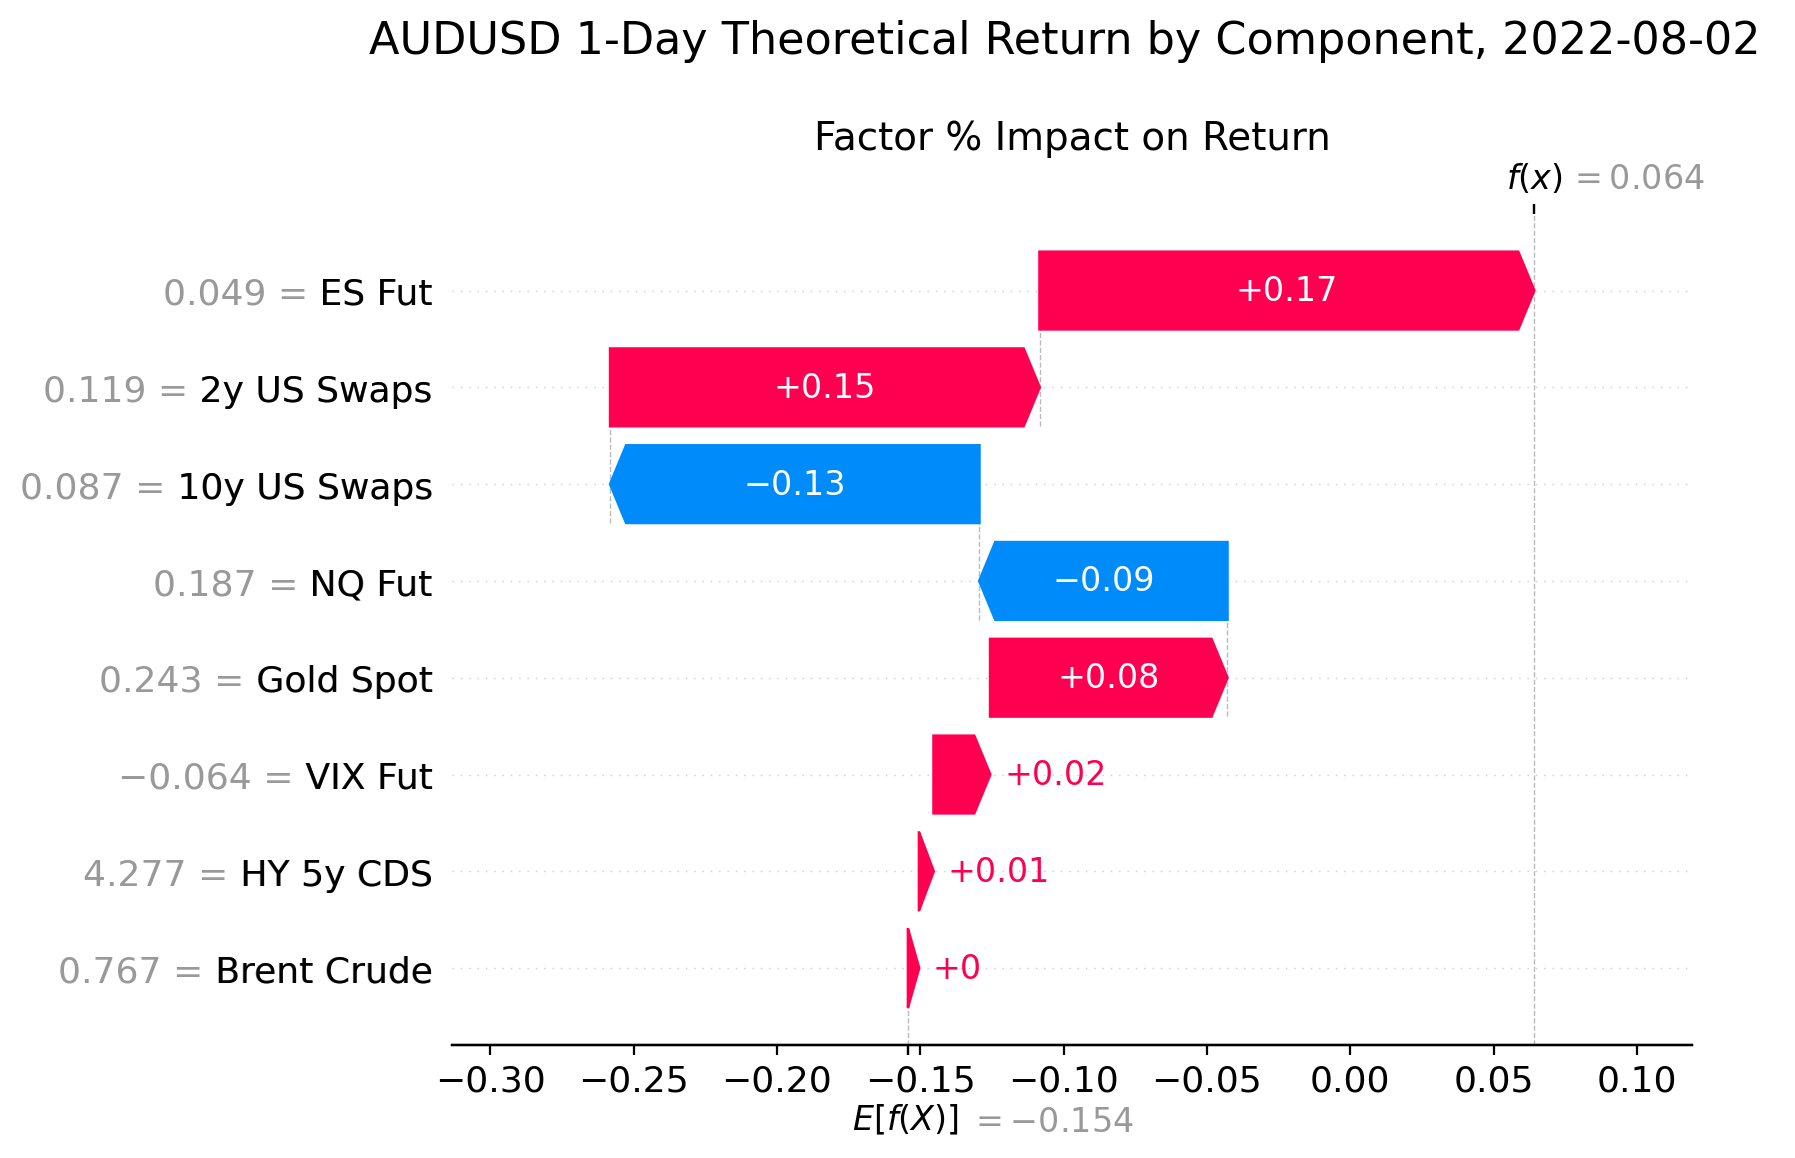

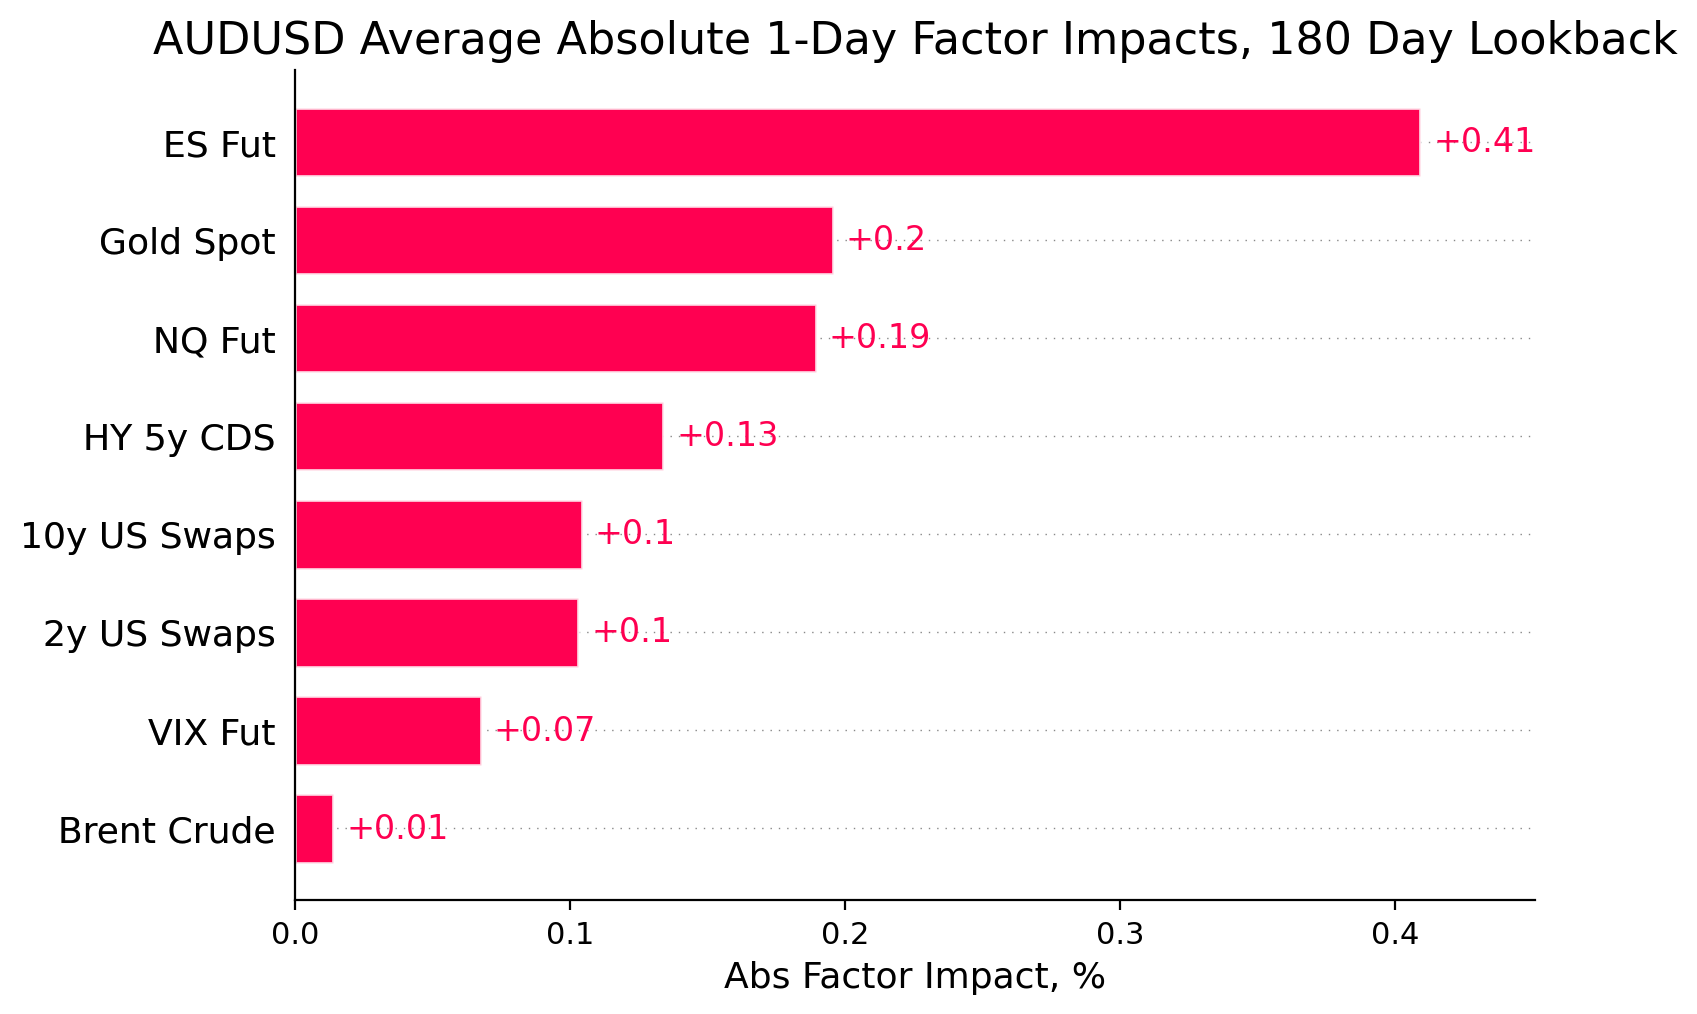

In [44]:
linear_decomp(label = "AUDUSD", tickers = factors_riskpar_aud, lookback_days = 180, 
                names = names_riskpar_aud, log_flag = log_flag_riskpar_aud)

USDZAR CURNCY                   0.657208
ES1 INDEX                       0.060654
NQ1 INDEX                       0.192678
UX1 INDEX                      -0.064400
USSW2 CURNCY                    0.117300
USSW10 CURNCY                   0.087600
CDX HY CDSI GEN 5Y SPRD Corp    4.277000
CO1 COMDTY                      0.766821
XAUUSD CURNCY                   0.242909
Name: 2022-08-02, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:          USDZAR CURNCY   R-squared (uncentered):                   0.418
Model:                            OLS   Adj. R-squared (uncentered):              0.377
Method:                 Least Squares   F-statistic:                              10.24
Date:                Tue, 02 Aug 2022   Prob (F-statistic):                    1.06e-10
Time:                        11:05:39   Log-Likelihood:                         -138.38
No. Observations:                 122   AIC:                          

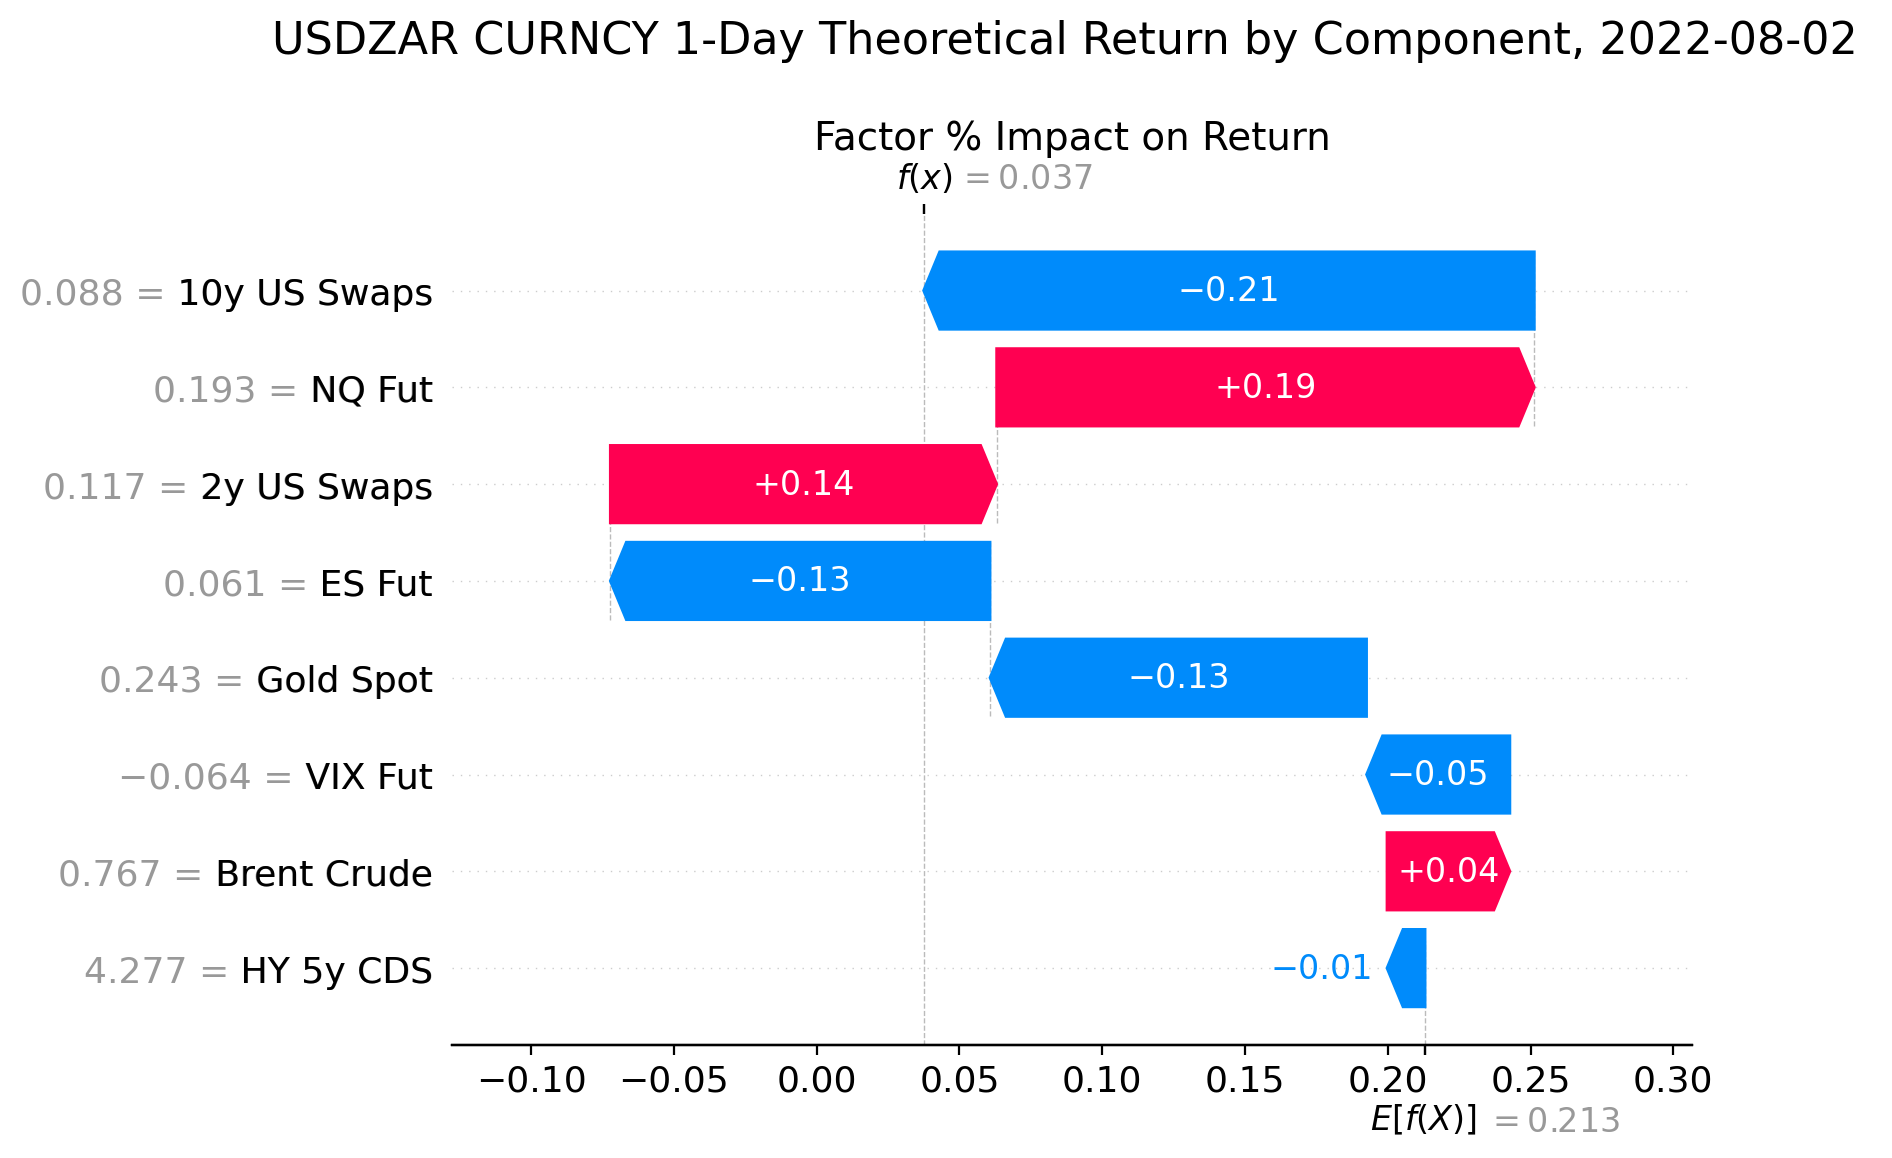

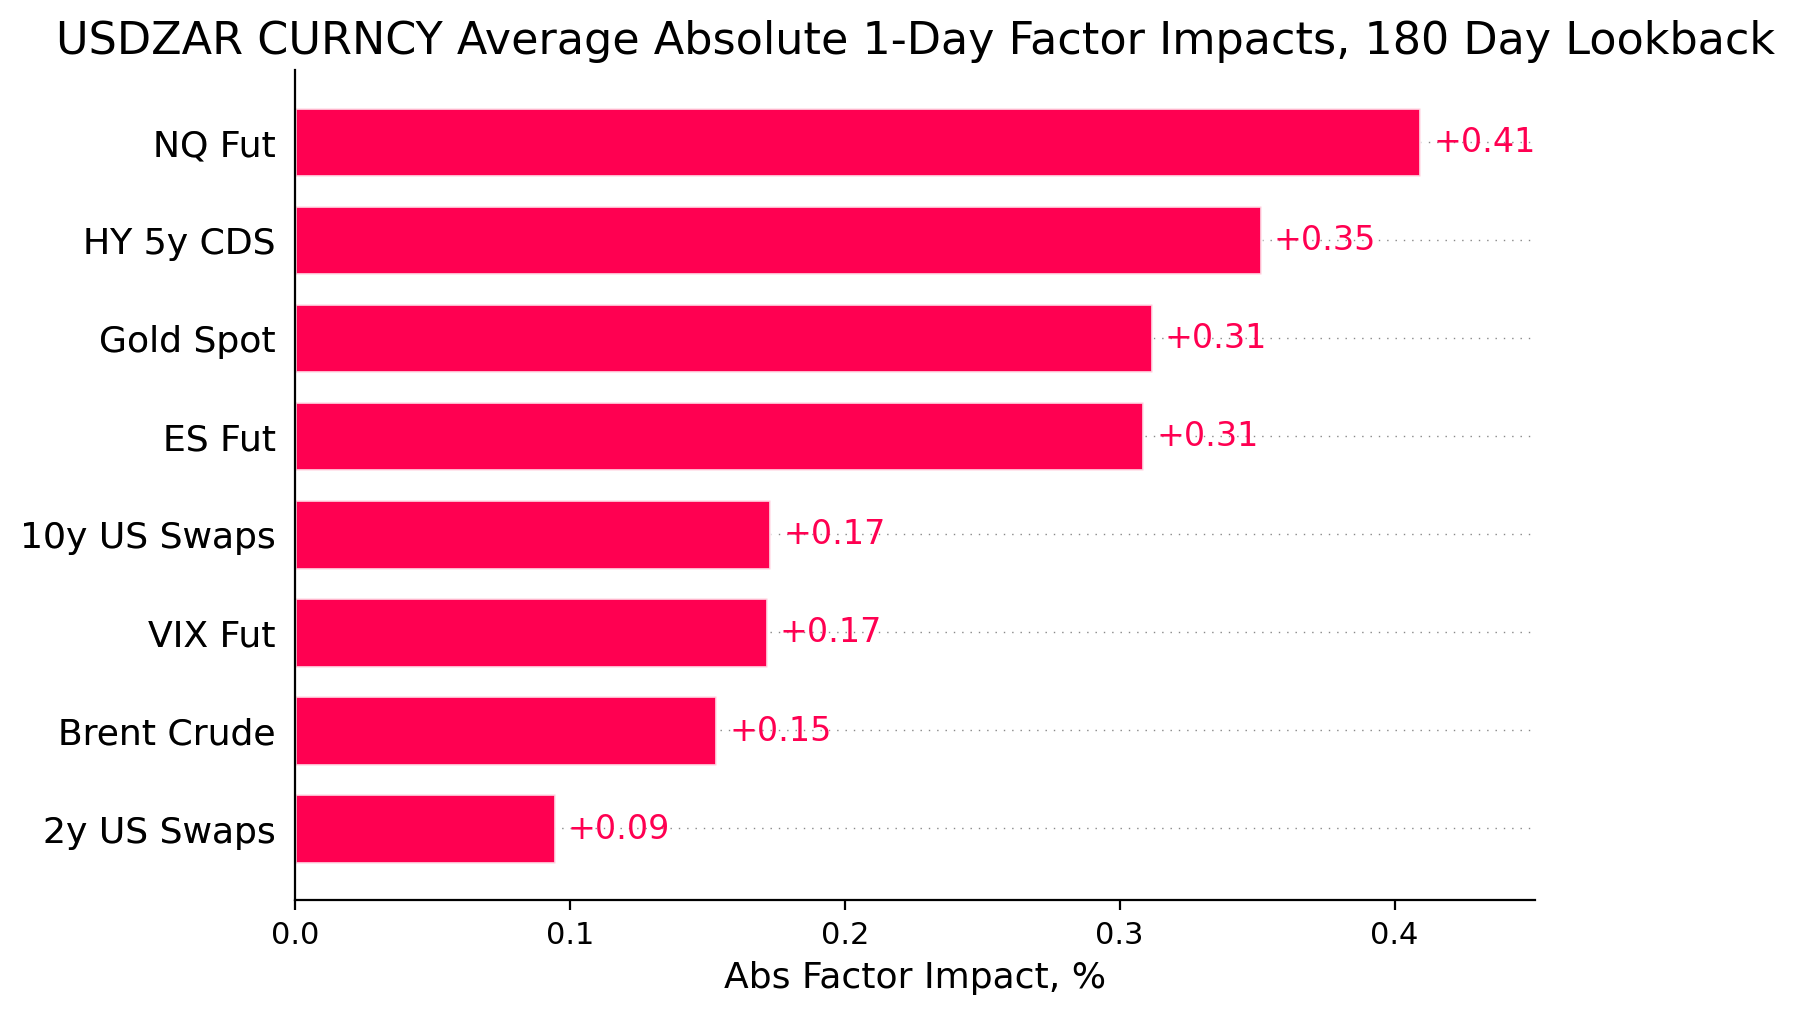

In [45]:
linear_decomp(label = "USDZAR CURNCY", tickers = factors_riskpar_zar, lookback_days = 180,
               names = names_riskpar_zar, log_flag = log_flag_riskpar_zar)

GBPUSD CURNCY    0.372594
ES1 INDEX       -0.064000
USGG2Y INDEX     0.050200
USGG10Y INDEX    0.050700
CO1 COMDTY      -1.643292
UX1 INDEX        0.014000
GUKG10 INDEX     0.119000
GUKG2 INDEX      0.142000
Name: 2022-08-16, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                 GBPUSD   R-squared (uncentered):                   0.361
Model:                            OLS   Adj. R-squared (uncentered):              0.322
Method:                 Least Squares   F-statistic:                              9.128
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                    6.65e-09
Time:                        11:24:44   Log-Likelihood:                         -92.618
No. Observations:                 120   AIC:                                      199.2
Df Residuals:                     113   BIC:                                      218.7
Df Model:                           7                  

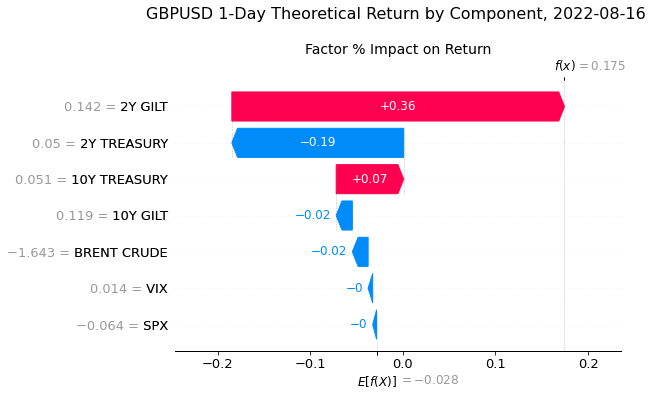

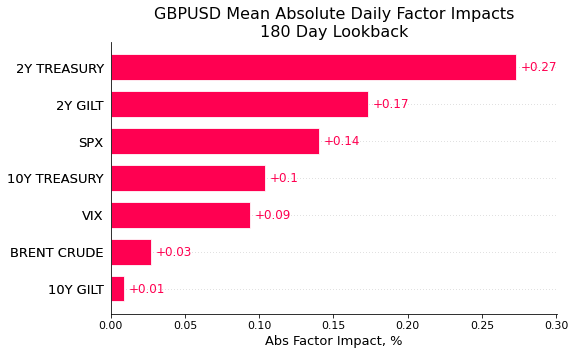

In [25]:
linear_decomp(label = "GBPUSD", tickers = factors_GBP, lookback_days = 180,
               names = names_GBP, log_flag = log_flag_GBP)

EURHUF CURNCY    1.326137
TZT1 COMDTY      8.231521
HFSW2 CURNCY     0.350000
EUSA2 CURNCY     0.024500
ES1 INDEX       -0.215436
Name: 2022-08-16, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                 EURHUF   R-squared (uncentered):                   0.270
Model:                            OLS   Adj. R-squared (uncentered):              0.244
Method:                 Least Squares   F-statistic:                              10.70
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                    2.04e-07
Time:                        09:26:12   Log-Likelihood:                         -139.41
No. Observations:                 120   AIC:                                      286.8
Df Residuals:                     116   BIC:                                      298.0
Df Model:                           4                                                  
Covariance Type:            nonrobust        

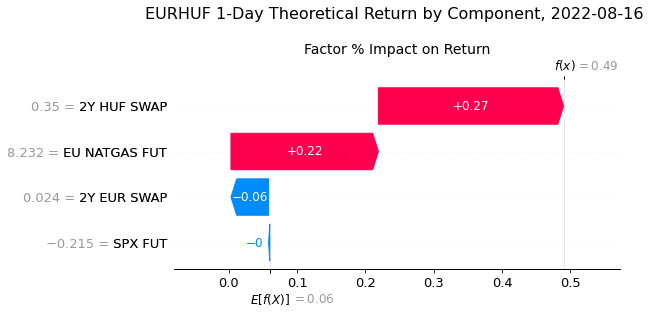

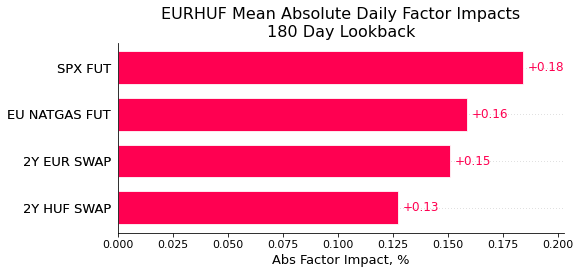

In [15]:
linear_decomp(label = "EURHUF", tickers = natgas_eurhuf, lookback_days = 180,
               names = names_natgas_eurhuf, log_flag = log_flag_natgas_eurhuf)

EURNOK CURNCY   -0.846267
TZT1 COMDTY      8.855109
NKSW2 CURNCY     0.067000
EUSA2 CURNCY     0.027000
ES1 INDEX       -0.267909
Name: 2022-08-16, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                 EURNOK   R-squared (uncentered):                   0.306
Model:                            OLS   Adj. R-squared (uncentered):              0.257
Method:                 Least Squares   F-statistic:                              6.177
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                    0.000344
Time:                        09:31:37   Log-Likelihood:                         -42.810
No. Observations:                  60   AIC:                                      93.62
Df Residuals:                      56   BIC:                                      102.0
Df Model:                           4                                                  
Covariance Type:            nonrobust        

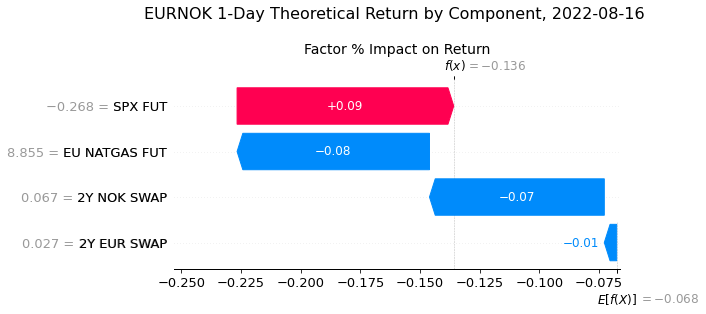

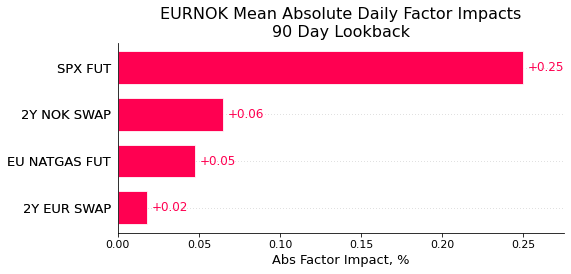

In [19]:
linear_decomp(label = "EURNOK", tickers = natgas_eurnok, lookback_days = 90,
               names = names_natgas_eurnok, log_flag = log_flag_natgas_eurnok)

EURPLN CURNCY    0.304986
TZT1 COMDTY      9.073175
PZSW2 CURNCY     0.055000
EUSA2 CURNCY     0.027700
ES1 INDEX       -0.250415
Name: 2022-08-16, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                 EURPLN   R-squared (uncentered):                   0.373
Model:                            OLS   Adj. R-squared (uncentered):              0.329
Method:                 Least Squares   F-statistic:                              8.343
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                    2.37e-05
Time:                        09:31:26   Log-Likelihood:                         -32.066
No. Observations:                  60   AIC:                                      72.13
Df Residuals:                      56   BIC:                                      80.51
Df Model:                           4                                                  
Covariance Type:            nonrobust        

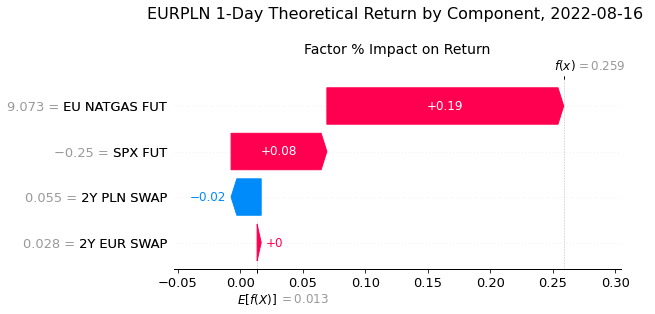

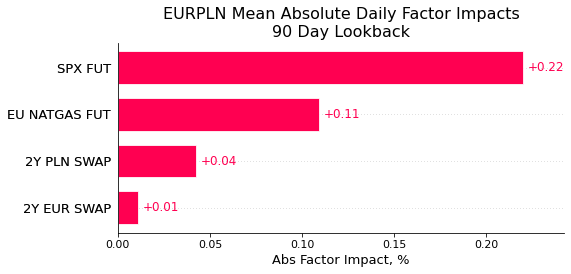

In [18]:
linear_decomp(label = "EURPLN", tickers = natgas_eurpln, lookback_days = 90,
               names = names_natgas_eurpln, log_flag = log_flag_natgas_eurpln)

EURUSD CURNCY    0.019683
TZT1 COMDTY      8.981853
USSW2 CURNCY     0.051400
EUSA2 CURNCY     0.035700
ES1 INDEX       -0.279574
Name: 2022-08-16, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                 EURUSD   R-squared (uncentered):                   0.297
Model:                            OLS   Adj. R-squared (uncentered):              0.247
Method:                 Least Squares   F-statistic:                              5.907
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                    0.000488
Time:                        09:36:49   Log-Likelihood:                         -47.286
No. Observations:                  60   AIC:                                      102.6
Df Residuals:                      56   BIC:                                      110.9
Df Model:                           4                                                  
Covariance Type:            nonrobust        

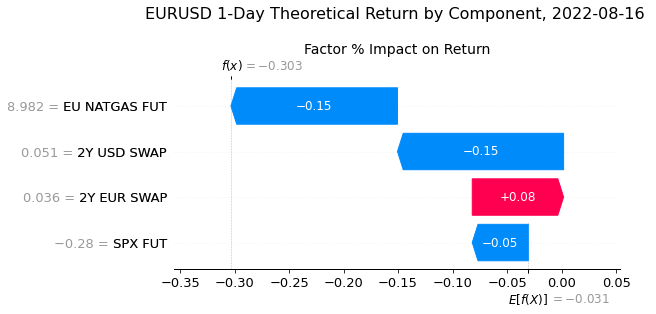

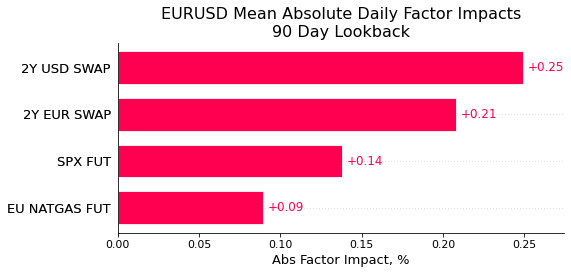

In [20]:
linear_decomp(label = "EURUSD", tickers = natgas_eurusd, lookback_days = 90,
               names = names_natgas_eurusd, log_flag = log_flag_natgas_eurusd)